In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from pandas import DataFrame
from pandas import Series
from pandas import TimeGrouper
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


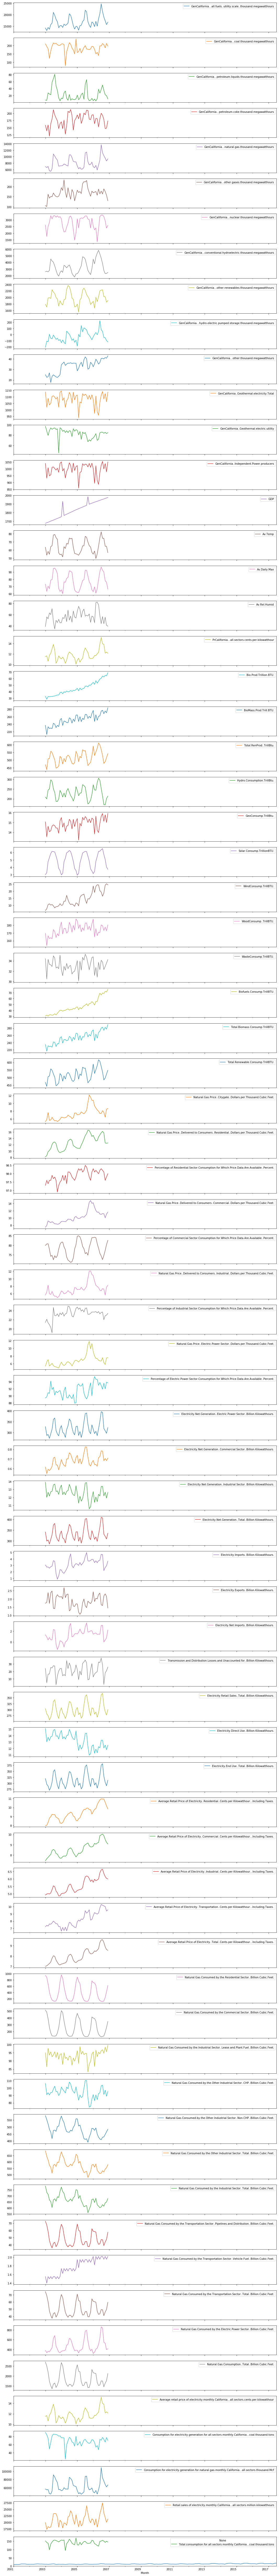

In [73]:
data=pd.read_csv('energydata.csv')
data.sort_index(inplace=True,ascending=False)
date=pd.to_datetime(data.Month, format="%b-%y")
data['Month']=date
data=data.set_index('Month')
data['2003':'2006'].plot(subplots=True,figsize=(18,200))
data['Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour'].plot()
plt.show()
#data.columns

In [58]:
cor=data.corr()
cor.head()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,1.000000,0.154368,0.094542,0.089134,0.707379,0.253458,0.255603,0.386369,0.225518,0.445466,...,-0.381961,0.097432,-0.371757,0.667043,-0.391623,0.494875,0.119762,0.701831,0.864379,0.140549
GenCalifornia...coal.thousand.megawatthours,0.154368,1.000000,0.256015,0.849725,0.033694,0.329432,0.769526,0.260413,-0.765389,-0.065005,...,-0.267926,-0.810684,-0.308627,-0.452893,-0.358696,-0.579910,0.983748,0.156722,0.094151,0.989048
GenCalifornia...petroleum.liquids.thousand.megawatthours,0.094542,0.256015,1.000000,0.380202,0.101606,0.034059,0.172655,0.036465,-0.228819,-0.097008,...,-0.075886,-0.390844,-0.096191,-0.212977,-0.088517,-0.364967,0.272372,0.275357,0.004895,0.277942
GenCalifornia...petroleum.coke.thousand.megawatthours,0.089134,0.849725,0.380202,1.000000,-0.072991,0.408438,0.760251,0.286116,-0.719314,-0.128544,...,-0.353236,-0.837378,-0.394298,-0.567580,-0.378454,-0.655859,0.822251,0.089859,-0.020315,0.873365
GenCalifornia...natural.gas.thousand.megawatthours,0.707379,0.033694,0.101606,-0.072991,1.000000,-0.014164,-0.059091,-0.312147,0.016692,0.169247,...,-0.005219,0.084494,-0.000551,0.520089,-0.052560,0.386792,0.015801,0.948548,0.746395,0.015886


In [59]:
mask=cor>=0.5
cornew=cor[mask]
cornew.head()
#cornew[mask.any(axis=1)]

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,1.000000,NaN,NaN,NaN,0.707379,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.667043,NaN,NaN,NaN,0.701831,0.864379,NaN
GenCalifornia...coal.thousand.megawatthours,NaN,1.000000,NaN,0.849725,NaN,NaN,0.769526,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.983748,NaN,NaN,0.989048
GenCalifornia...petroleum.liquids.thousand.megawatthours,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GenCalifornia...petroleum.coke.thousand.megawatthours,NaN,0.849725,NaN,1.000000,NaN,NaN,0.760251,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.822251,NaN,NaN,0.873365
GenCalifornia...natural.gas.thousand.megawatthours,0.707379,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.520089,NaN,NaN,NaN,0.948548,0.746395,NaN


In [60]:
cornew=cornew.fillna(0)  # ASSUMPTION - correlation less than 0.5 has less impact so ignored
cornew.head()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,1.000000,0.000000,0.0,0.000000,0.707379,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.667043,0.0,0.0,0.000000,0.701831,0.864379,0.000000
GenCalifornia...coal.thousand.megawatthours,0.000000,1.000000,0.0,0.849725,0.000000,0.0,0.769526,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.983748,0.000000,0.000000,0.989048
GenCalifornia...petroleum.liquids.thousand.megawatthours,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
GenCalifornia...petroleum.coke.thousand.megawatthours,0.000000,0.849725,0.0,1.000000,0.000000,0.0,0.760251,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.822251,0.000000,0.000000,0.873365
GenCalifornia...natural.gas.thousand.megawatthours,0.707379,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.520089,0.0,0.0,0.000000,0.948548,0.746395,0.000000


In [61]:
# reduce the no of columns

**SCENARIO** - 